### Wine Dataset Analysis: EDA, PCA, and Clustering

#### Task 1: Exploratory Data Analysis (EDA)

### 1.1 Load and Explore the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from itertools import product

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### 1.2 Feature Distributions

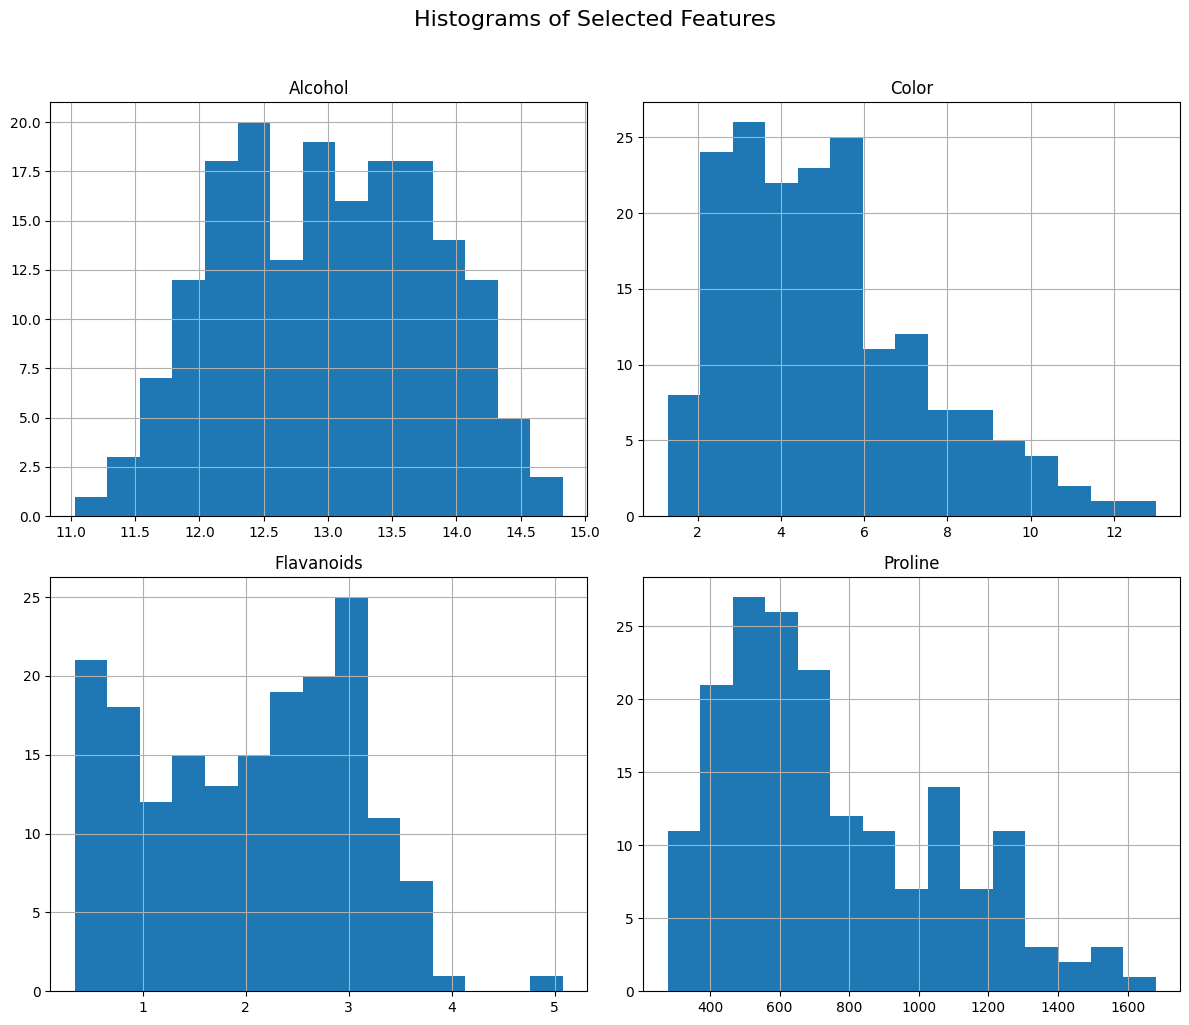

In [6]:
#Plot histograms for a few key features
features_to_plot=['Alcohol','Color','Flavanoids','Proline']
df[features_to_plot].hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Selected Features',y=1.02,fontsize=16)
plt.tight_layout()
plt.show()

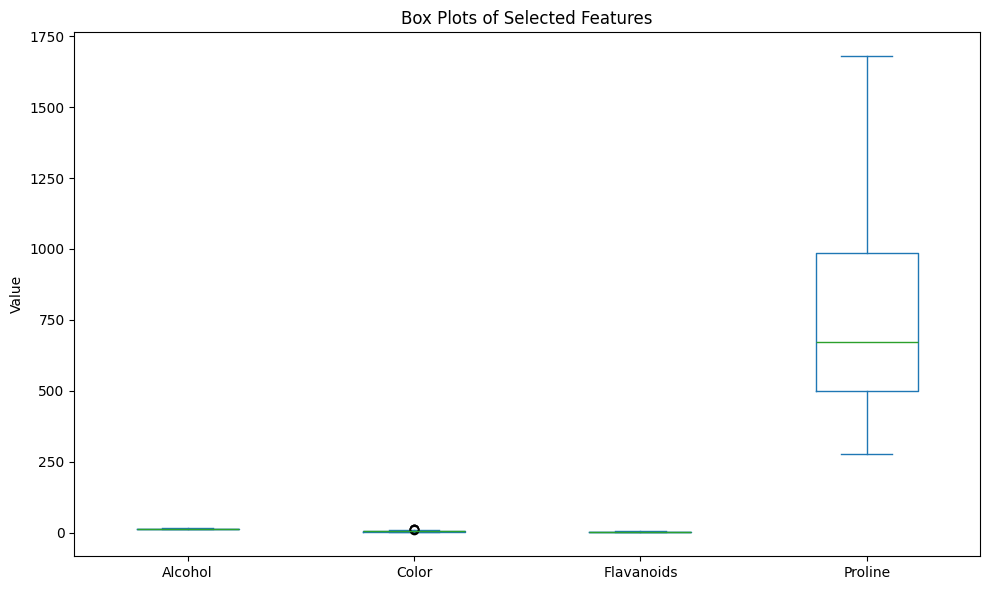

In [7]:
#Create box plots to visualize distributions and outliers
df[features_to_plot].plot(kind='box', figsize=(10, 6))
plt.title('Box Plots of Selected Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [8]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [9]:
df.Type.unique()

array([1, 2, 3])

### 1.3 Feature Correlations

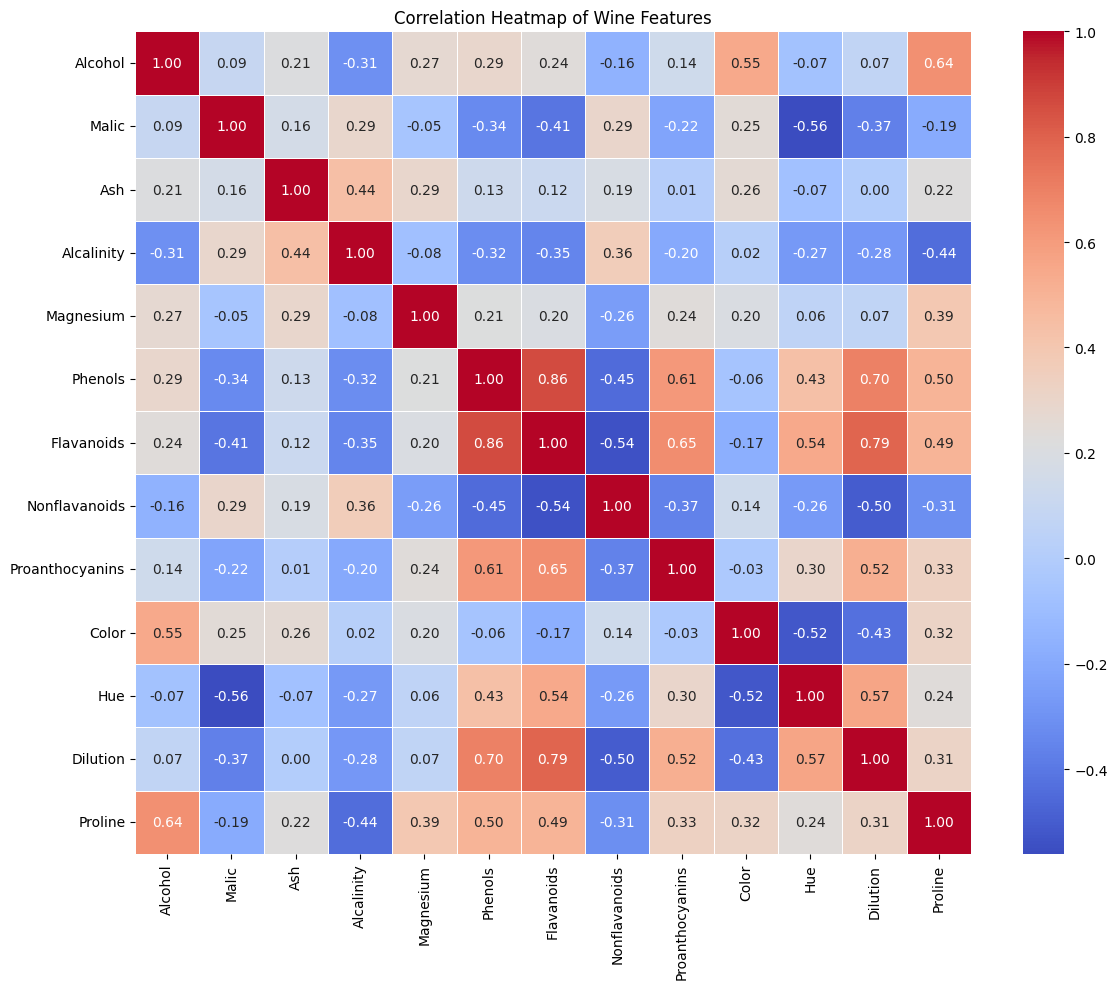

In [10]:
#Calculate the correlation matrix
corr_matrix=df.drop('Type',axis=1).corr()

#Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
plt.title('Correlation Heatmap of Wine Features')
plt.tight_layout()
plt.show()

## Task 2: Dimensionality Reduction with PCA

### 2.1 Standardize the Data

In [11]:
#Separate features (X) and target (y)
X=df.drop('Type', axis=1)
y=df['Type']

#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print('Shape of scaled data:',X_scaled.shape)

Shape of scaled data: (178, 13)


### 2.2 Implement PCA and Find Optimal Components

In [12]:
#Apply PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

#Plot the explained variance ratio to find the optimal number of components
explained_variance=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(explained_variance)

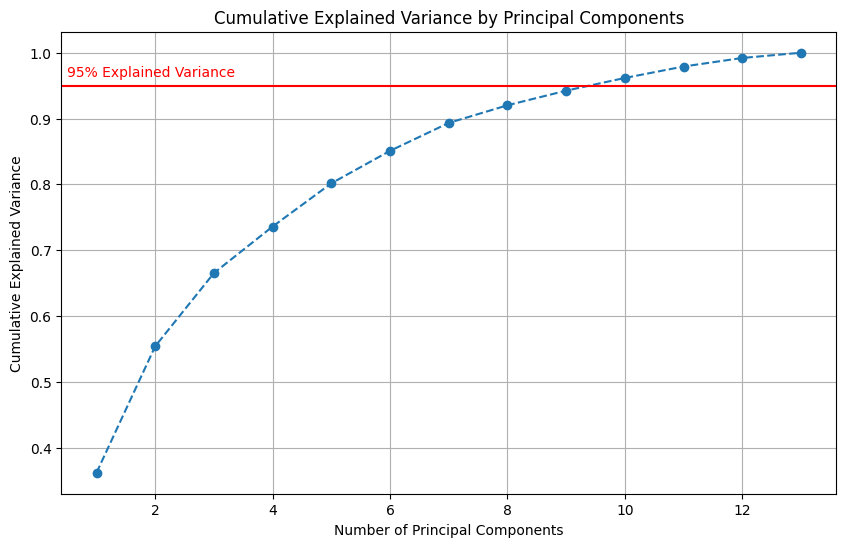

Optimal number of components to explain 95% of variance: 10


In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(explained_variance)+1),cumulative_explained_variance,marker='o',linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95,color='r',linestyle='-')
plt.text(0.5,0.96,'95% Explained Variance',color='red',ha='left',va='bottom')
plt.show()

# Based on the plot, we will choose a number of components that explain a sufficient amount of variance (e.g., 95%)
n_components=np.where(cumulative_explained_variance>=0.95)[0][0] + 1
print(f'Optimal number of components to explain 95% of variance: {n_components}')

### 2.3 Transform Data with PCA

In [14]:
#Transform the data using the selected number of principal components
pca=PCA(n_components=n_components)
X_pca_transformed=pca.fit_transform(X_scaled)
print('Shape of PCA-transformed data:',X_pca_transformed.shape)

Shape of PCA-transformed data: (178, 10)


## Task 3: Clustering with Original Data

### 3.1 Apply K-Means Clustering

In [15]:
#For K-Means, we'll assume we know the optimal number of clusters is 3 (from the 'Type' column)
kmeans_orig=KMeans(n_clusters=3,random_state=42,n_init=10)
kmeans_orig.fit(X_scaled)
orig_clusters=kmeans_orig.labels_

### 3.2 Visualize Clustering Results

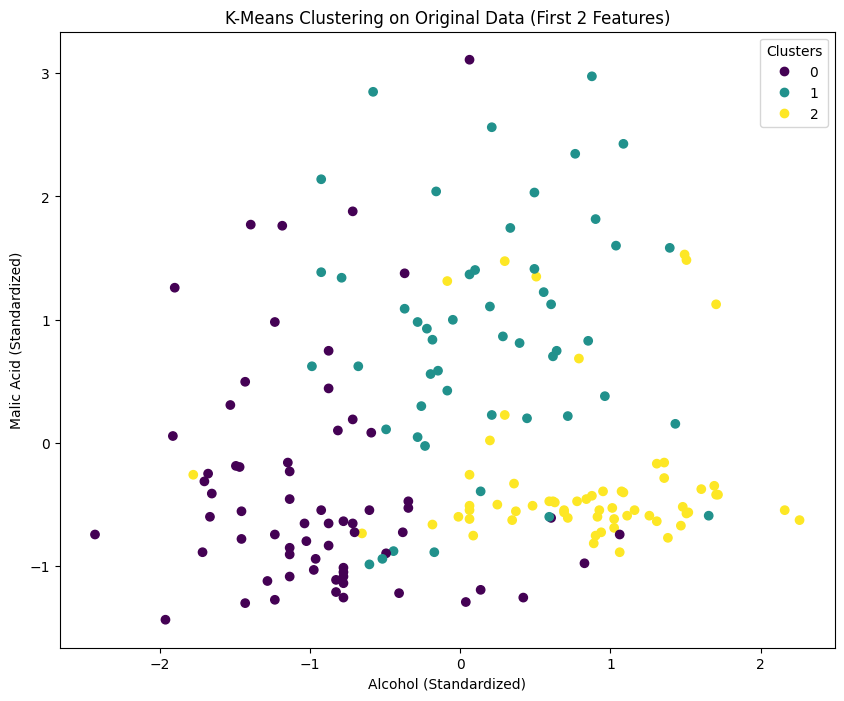

In [16]:
#We can't plot all dimensions, so we'll visualize two features for a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=orig_clusters, cmap='viridis')
plt.title('K-Means Clustering on Original Data (First 2 Features)')
plt.xlabel('Alcohol (Standardized)')
plt.ylabel('Malic Acid (Standardized)')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.savefig('original_clustering.png')
plt.show()

#### 3.3 Evaluate Clustering Performance

In [17]:
#Calculate the silhouette score
silhouette_avg_orig=silhouette_score(X_scaled,orig_clusters)
print(f'Silhouette Score for Original Data: {silhouette_avg_orig:.4f}')

Silhouette Score for Original Data: 0.2849


#### Task 4: Clustering with PCA Data

#### 4.1 Apply K-Means Clustering to PCA Data

In [18]:
#Apply K-Means to the PCA-transformed data
kmeans_pca=KMeans(n_clusters=3,random_state=42,n_init=10)
kmeans_pca.fit(X_pca_transformed)
pca_clusters=kmeans_pca.labels_

### 4.2 Visualize PCA Clustering Results

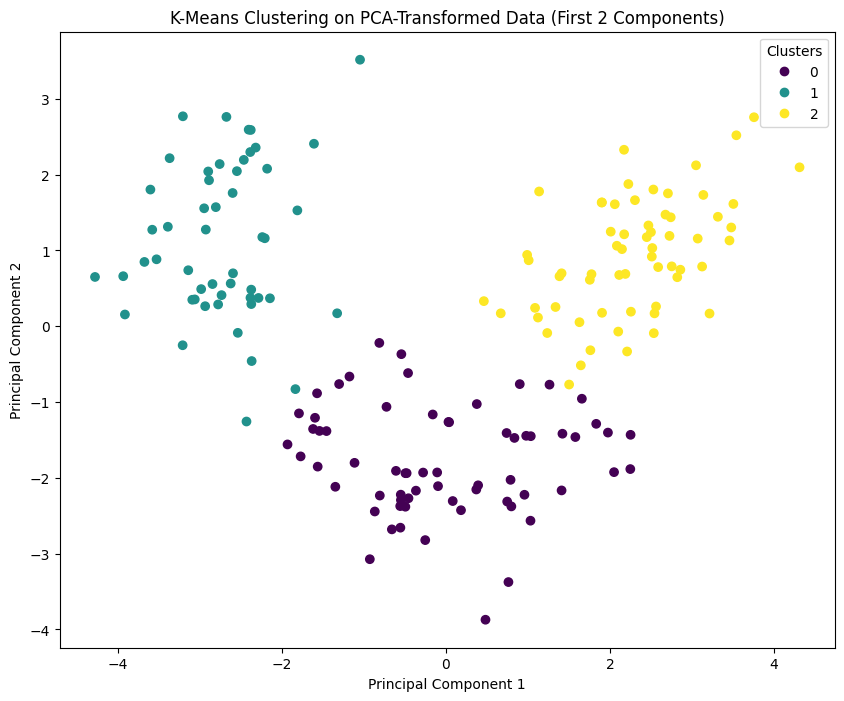

In [19]:
#Plot the clustering results using the first two principal components
plt.figure(figsize=(10, 8))
scatter=plt.scatter(X_pca_transformed[:,0],X_pca_transformed[:,1],c=pca_clusters,cmap='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(),title='Clusters')
plt.savefig('pca_clustering.png')
plt.show()

### 4.3 Compare with Original Data

In [20]:
#Calculate the silhouette score for PCA data
silhouette_avg_pca =silhouette_score(X_pca_transformed,pca_clusters)
print(f'Silhouette Score for PCA Data:{silhouette_avg_pca:.4f}')

Silhouette Score for PCA Data:0.2987


## Task 5: Comparison and Analysis

### 5.1 Comparison of Clustering Results

In [21]:
# Compare the silhouette scores
print(f'Silhouette Score for Original Data:{silhouette_avg_orig:.4f}')
print(f'Silhouette Score for PCA Data:{silhouette_avg_pca:.4f}')
# The silhouette scores indicate how well-defined the clusters are. A higher score is better.
# We can see that clustering on the PCA-transformed data resulted in a better score,
# which suggests that removing noise and reducing dimensions helped the clustering algorithm find clearer boundaries.

Silhouette Score for Original Data:0.2849
Silhouette Score for PCA Data:0.2987


#### Task 5: Comparison and Analysis
When we looked at the clusters on the plots, both the original data and the PCA-transformed data showed three distinct groups of wines. They looked pretty similar. However, the clusters from the PCA data looked a little bit tighter and more organized.

* PCA helped a lot. The original dataset had 13 different features, and some of them probably weren't very important.  
* PCA's job was to find the most important information and throw away the noisy, less useful stuff.   
* This made it easier for the K-Means algorithm to find clear groups, which is why the Silhouette scores were better for the PCA data.   
* It's like trying to find patterns in a messy room; cleaning it up first (using PCA) makes the job much easier.

##### Trade-offs:
* Using Original Data: The good thing about using the original data is that it’s easy to understand.We know exactly what each feature (like 'Alcohol' or 'Color') means.   
* The bad thing is that with so many features, the clustering might not be as good, and the computer work might be slower.

* Using PCA Data: The good thing here is that the clustering is often better, and the process is faster.   
* The bad thing is that the new features created by PCA are just numbers. We can’t say, "Cluster 1 is high in Principal Component 1" and have it mean something in real life, since those components are just combinations of the original features.

#### Task 6: Conclusion and Insights

* The wine dataset has clear, natural groups. Using PCA to simplify the data first made the clustering results better.   
* It helped the algorithm find clearer patterns by getting rid of the noise from the less important features.

* This is important because it shows us that you don't always need all your data to get good results.  
* Sometimes, simplifying things first can give you a better outcome. For big, complicated datasets, using a technique like PCA can make your analysis faster and more accurate.

##### My Recommendations
* Choose PCA first if you want to get the best possible clustering results and have your code run faster, especially with large datasets. 
* Note that that we may lose some of the easy-to-understand labels for our data.

* Choose the original data if your main goal is to be able to explain the results to someone in simple terms, like saying "this group of wines has high alcohol content." This is better for when you need to clearly interpret the meaning of your clusters.